In [1]:
import pickle

with open('./dataset complete/train_test_data/train_data.pkl', 'rb') as file:
    train_data = pickle.load(file)
train_inputs, train_contexts = train_data[0]
train_tagets = train_data[1]
del train_data

In [8]:
with open('./dataset complete/preprocessed_files/5414471.pkl', 'rb') as file:
    train_data = pickle.load(file)
train_data.iloc[100]['participant_id']

217

In [2]:
with open('./dataset complete/train_test_data/test_data.pkl', 'rb') as file:
    test_data = pickle.load(file)
test_inputs, test_contexts = test_data[0]
test_tagets = test_data[1]
del test_data

In [2]:
import json

with open ("./dataset complete/character_to_prediction_index.json", "r") as f:
    characters = json.load(f)

# TODO: tune hyperparameters
EPOCHS = 20
BATCH_SIZE=64
d_model = 128  # hidden layer(s) dimensionality
num_layers = 4 # how many encoders and decoders to stack
num_heads = 7 # how many attention heads should every mha have
ff_dim = 200 # how many neurons shall feed-forward layers have
dropout_rate = 0.1

output_vocab_size = len(characters) + 2

In [4]:
from transformer import get_compiled_transformer

transformer = get_compiled_transformer(
    d_model=d_model,
    num_layers=num_layers,
    num_heads=num_heads,
    ff_dim=ff_dim,
    dropout_rate=dropout_rate,
    output_vocab_size=output_vocab_size
)

In [5]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="model_checkpoints/cp-{epoch:04d}.ckpt", save_weights_only=True, verbose=1
)
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = transformer.fit([train_inputs[:100], train_contexts[:100]], train_tagets[:100], epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, callbacks=[cp_callback, es_callback])

transformer.evaluate([test_inputs[:100], test_contexts[:100]], test_tagets[:100], batch_size=BATCH_SIZE)

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node 'transformer/encoder/encoder_layer_2/global_self_attention_2/multi_head_attention_2/einsum/Einsum' defined at (most recent call last):
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\WG\AppData\Local\Temp\ipykernel_9852\1805447703.py", line 10, in <module>
      history = transformer.fit([train_inputs[:100], train_contexts[:100]], train_tagets[:100], epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, callbacks=[cp_callback, es_callback])
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\Documents\PML Projekt\transformer.py", line 231, in call
      x_enc = self.encoder(mp_data)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\Documents\PML Projekt\transformer.py", line 160, in call
      for i in range(self.num_layers):
    File "C:\Users\WG\Documents\PML Projekt\transformer.py", line 161, in call
      x = self.enc_layers[i](x)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\Documents\PML Projekt\transformer.py", line 130, in call
      x = self.self_attention(x)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\Documents\PML Projekt\transformer.py", line 78, in call
      attn_output = self.mha(
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\layers\attention\multi_head_attention.py", line 596, in call
      attention_output, attention_scores = self._compute_attention(
    File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\keras\layers\attention\multi_head_attention.py", line 525, in _compute_attention
      attention_scores = tf.einsum(self._dot_product_equation, key, query)
Node: 'transformer/encoder/encoder_layer_2/global_self_attention_2/multi_head_attention_2/einsum/Einsum'
OOM when allocating tensor with shape[64,7,900,900] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node transformer/encoder/encoder_layer_2/global_self_attention_2/multi_head_attention_2/einsum/Einsum}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_13427]

In [ ]:
print(history.history.keys())

In [1]:
import matplotlib.pyplot as plt

plt.plot(history.history['masked_accuracy'])
plt.plot(history.history['val_masked_accuracy'])
plt.title('Accuracy over Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ImportError: DLL load failed while importing _imaging: Das angegebene Modul wurde nicht gefunden.

In [2]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

# Data Generator

In [4]:
import os
import pandas as pd
from copy import deepcopy
import numpy as np
import random
from tensorflow import keras

class ASLDataGenerator(keras.utils.Sequence):

    def __init__(self, dataset_path: str, max_phrase_length: int, max_sign_length: int, batch_size: int, train: bool = True):
        super().__init__()
        self.ds_path = dataset_path
        self.files = os.listdir(dataset_path)
        self.max_phrase_length = max_phrase_length
        self.max_sign_length = max_sign_length
        self.unwanted_columns = ['sequence_id', 'frame', 'participant_id', 'phrase']
        self.train = train
        self.batch_size = batch_size

    def __len__(self):
        return len(self.files)//self.batch_size

    def shuffle(self):
        random.shuffle(self.files)

    def on_epoch_end(self):
        if self.train:
            self.shuffle()

    def __getitem__(self, idx: int):
        # TODO: integrate batch_size --> take all examples from idx to idx + batch_size
        batch_signs = []
        batch_contexts = []
        batch_phrases = []
        for i in range(idx, idx+self.batch_size):
            df_phrase = pd.read_pickle(self.ds_path + '/' + self.files[idx])
            phrase = df_phrase.iloc[0].phrase
            if len(phrase) > self.max_phrase_length:
                print('Houston we have a problem!')

            while len(phrase) < self.max_phrase_length:
                phrase.append(59)
            context = deepcopy(phrase)
            context.insert(0, 60)
            context = context[:-1]

            df_phrase = df_phrase.drop(self.unwanted_columns, axis=1)
            signs = df_phrase.to_numpy(copy=True)

            if signs.shape[0] > self.max_sign_length:
                print('Hooooouuuuusteeeeeen!')
            signs = np.pad(signs, [(0, self.max_sign_length-signs.shape[0]), (0,0)], 'edge')
            batch_signs.append(signs)
            batch_contexts.append(context)
            batch_phrases.append(phrase)

        batch_signs = np.array(batch_signs)
        batch_contexts = np.array(batch_contexts)
        batch_phrases = np.array(batch_phrases)

        return [batch_signs, batch_contexts], batch_phrases

In [2]:
from tensorflow import keras

class ShuffleCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        data_gen_train.shuffle()

In [5]:
import tensorflow as tf
MAX_PHRASE_LENGTH = 100
MAX_SIGN_LENGTH = 900
BATCH_SIZE= 32

data_gen_train = ASLDataGenerator('./dataset complete/preprocessed_files_data_generator/train_ones', MAX_PHRASE_LENGTH, MAX_SIGN_LENGTH, batch_size=BATCH_SIZE)
data_gen_train.shuffle()


data_gen_test = ASLDataGenerator('./dataset complete/preprocessed_files_data_generator/test_ones', MAX_PHRASE_LENGTH, MAX_SIGN_LENGTH, train=False, batch_size=BATCH_SIZE)

data_gen_val = ASLDataGenerator('./dataset complete/preprocessed_files_data_generator/val_ones', MAX_PHRASE_LENGTH, MAX_SIGN_LENGTH, train=False, batch_size=BATCH_SIZE)

In [3]:
import tensorflow as tf
MAX_PHRASE_LENGTH = 100
MAX_SIGN_LENGTH = 900
BATCH_SIZE=32

data_gen_train = ASLDataGenerator('./dataset complete/preprocessed_files_data_generator/train', MAX_PHRASE_LENGTH, MAX_SIGN_LENGTH, batch_size=BATCH_SIZE)
data_gen_train.shuffle()


data_gen_test = ASLDataGenerator('./dataset complete/preprocessed_files_data_generator/test', MAX_PHRASE_LENGTH, MAX_SIGN_LENGTH, train=False, batch_size=BATCH_SIZE)

data_gen_val = ASLDataGenerator('./dataset complete/preprocessed_files_data_generator/validation_files', MAX_PHRASE_LENGTH, MAX_SIGN_LENGTH, train=False, batch_size=BATCH_SIZE)

In [6]:
input, phrase = data_gen_train[0]

In [7]:
input

[array([[[-1.        , -1.        , -1.        , ..., -0.06058084,
          -0.06095899, -0.06105148],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         ...,
         [ 0.78038585,  0.7176743 ,  0.6626531 , ..., -1.        ,
          -1.        , -1.        ],
         [ 0.78038585,  0.7176743 ,  0.6626531 , ..., -1.        ,
          -1.        , -1.        ],
         [ 0.78038585,  0.7176743 ,  0.6626531 , ..., -1.        ,
          -1.        , -1.        ]],
 
        [[-1.        , -1.        , -1.        , ..., -0.06058084,
          -0.06095899, -0.06105148],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         ...,
         [ 0.78038585,  0.7176743

# Train Transformer using Generator

In [3]:
import json

with open ("./dataset complete/character_to_prediction_index.json", "r") as f:
    characters = json.load(f)

# TODO: tune hyperparameters
EPOCHS = 20
d_model = 130  # hidden layer(s) dimensionality # TODO: test 256  - alt: 128
num_layers = 1 # how many encoders and decoders to stack # TODO: test 2  - 3
num_heads = 2 # how many attention heads should every mha have  # TODO: test 8  - 5
ff_dim = 381 # how many neurons shall feed-forward layers have # TODO: test 1024  - 256
dropout_rate = 0.1111  # TODO: test 0.3

output_vocab_size = len(characters) + 1

In [4]:
from transformer_hyperparam import get_compiled_transformer

transformer = get_compiled_transformer(
    d_model=d_model,
    num_layers=num_layers,
    num_heads=num_heads,
    ff_dim=ff_dim,
    dropout_rate=dropout_rate,
    output_vocab_size=output_vocab_size
)

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
import tensorflowjs as tfjs

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="model_checkpoints/cp-{epoch:04d}.ckpt", save_weights_only=True, verbose=1
)
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
#shuffle_callback = ShuffleCallback()

history = transformer.fit(data_gen_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=data_gen_val, callbacks=[cp_callback, es_callback])

transformer.evaluate(data_gen_test, batch_size=BATCH_SIZE)

Epoch 1/20
2394/2394 [==============================] - ETA: 0s - loss: 2.9667 - masked_accuracy: 0.1658
Epoch 1: saving model to model_checkpoints\cp-0001.ckpt
2394/2394 [==============================] - 177s 73ms/step - loss: 2.9667 - masked_accuracy: 0.1658 - val_loss: 2.5375 - val_masked_accuracy: 0.2312
Epoch 2/20
2394/2394 [==============================] - ETA: 0s - loss: 2.6211 - masked_accuracy: 0.2157
Epoch 2: saving model to model_checkpoints\cp-0002.ckpt
2394/2394 [==============================] - 173s 72ms/step - loss: 2.6211 - masked_accuracy: 0.2157 - val_loss: 2.5051 - val_masked_accuracy: 0.2487
Epoch 3/20
2394/2394 [==============================] - ETA: 0s - loss: 2.5064 - masked_accuracy: 0.2450
Epoch 3: saving model to model_checkpoints\cp-0003.ckpt
2394/2394 [==============================] - 175s 73ms/step - loss: 2.5064 - masked_accuracy: 0.2450 - val_loss: 2.3309 - val_masked_accuracy: 0.2820
Epoch 4/20
2394/2394 [==============================] - ETA: 0s - l

[1.683518648147583, 0.4786812961101532]

In [7]:
transformer.save('./savedModel')
tfjs.converters.convert_tf_saved_model('./savedModel', './tfjs')

INFO:tensorflow:Assets written to: ./savedModel\assets


INFO:tensorflow:Assets written to: ./savedModel\assets


TypeError: Unable to serialize 130.0 to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [13]:
transformer.save('./savedModel/model.h5', save_format='tf')

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [14]:
tf.saved_model.save(transformer, './savedModel/')

INFO:tensorflow:Assets written to: ./savedModel/assets


INFO:tensorflow:Assets written to: ./savedModel/assets


In [19]:
tfjs.converters.convert_tf_saved_model('./savedModel/', './tfjs')

ValueError: Unsupported Ops in the model before optimization
MatrixBandPart

In [20]:
tfjs.__version__

'3.21.0'

bisher höchste accuracy bei
mit -1: 25%     ff_dim= 512 dropout= 0.4 -> 28% bei val accuracy sogar 31% \cp-0014.cpkt
gespiegelt: 23%

In [16]:
print(history.history.keys())

dict_keys(['loss', 'masked_accuracy', 'val_loss', 'val_masked_accuracy'])


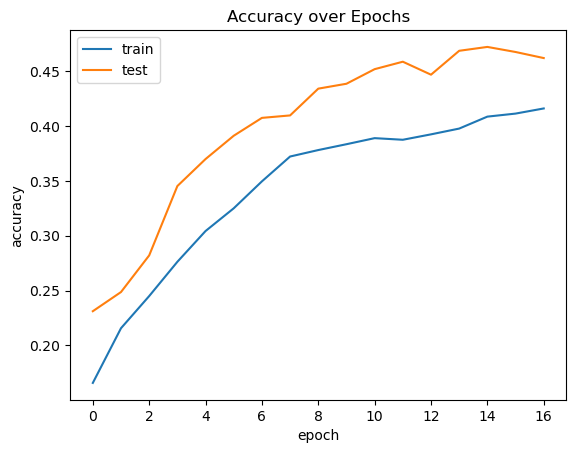

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['masked_accuracy'])
plt.plot(history.history['val_masked_accuracy'])
plt.title('Accuracy over Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

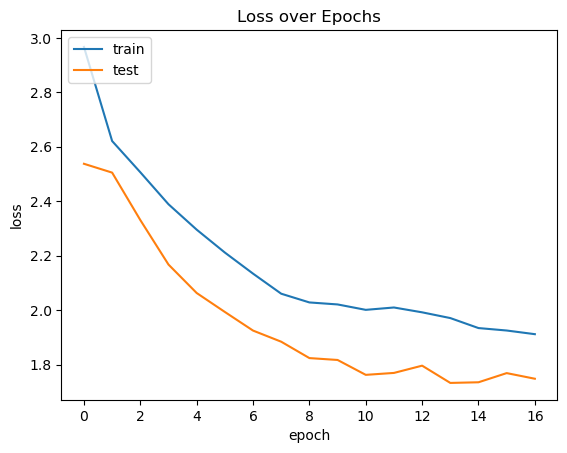

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Translate

In [75]:
import tensorflow as tf
import numpy as np
from copy import deepcopy
MAX_PHRASE_LENGTH = 100
class Translator:
    def __init__(self, transformer):
        self.transformer = transformer

    def translate(self, signs, max_length=MAX_PHRASE_LENGTH):
        print(signs.shape)
        signs = tf.convert_to_tensor(signs, dtype=tf.float32, name='input_1')

        signs = signs[tf.newaxis]

        start = np.array([60])
        end = np.array([59])

        output = tf.TensorArray(dtype=tf.int32, size=0, dynamic_size=True)
        output.write(0, start)

        for i in tf.range(max_length):
            context = deepcopy(output)
            while context.size() < 100:
                context.write(context.size(), end)
            context = tf.transpose(context.stack())
            context = tf.identity(context, name='input_2')
            predictions = self.transformer([signs, context], training=False)

            predictions = predictions[:, -1:, :]
            predicted = tf.argmax(predictions, axis=-1)
            output.write(i+1, predicted[0])

            if predicted == end:
                break
        text = ''
        output = output.numpy().tolist()

        return output

In [2]:
transformer = tf.saved_model.load('./savedModel')

In [76]:
translator = Translator(transformer)

In [77]:
translator.translate(input[0][0], MAX_PHRASE_LENGTH)

(900, 144)
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):  File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)  File "C:\Users\WG\AppData\Local\Temp\ipykernel_20472\708788890.py", line 1, in <module>
    translator.translate(input[0][0], MAX_PHRASE_LENGTH)  File "C:\Users\WG\AppData\Local\Temp\ipykernel_20472\583582471.py", line 19, in translate
    output.write(0, start)  File "C:\Users\WG\miniconda3\envs\PML_Projekt\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped


ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (1 total):
    * [<tf.Tensor 'inputs:0' shape=(1, 900, 144) dtype=float32>,
 <tf.Tensor 'inputs_1:0' shape=(1, 100) dtype=int32>]
  Keyword arguments: {'training': False}

 Expected these arguments to match one of the following 4 option(s):

Option 1:
  Positional arguments (1 total):
    * (TensorSpec(shape=(None, 900, 144), dtype=tf.float32, name='input_1'),
 TensorSpec(shape=(None, 100), dtype=tf.int32, name='input_2'))
  Keyword arguments: {'training': False}

Option 2:
  Positional arguments (1 total):
    * (TensorSpec(shape=(None, 900, 144), dtype=tf.float32, name='inputs/0'),
 TensorSpec(shape=(None, 100), dtype=tf.int32, name='inputs/1'))
  Keyword arguments: {'training': False}

Option 3:
  Positional arguments (1 total):
    * (TensorSpec(shape=(None, 900, 144), dtype=tf.float32, name='inputs/0'),
 TensorSpec(shape=(None, 100), dtype=tf.int32, name='inputs/1'))
  Keyword arguments: {'training': True}

Option 4:
  Positional arguments (1 total):
    * (TensorSpec(shape=(None, 900, 144), dtype=tf.float32, name='input_1'),
 TensorSpec(shape=(None, 100), dtype=tf.int32, name='input_2'))
  Keyword arguments: {'training': True}